In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import matplotlib.patches as mpatches

datafile = '../data/country_gdp_growth.csv'
shapefile = '../data/world_shape/ne_10m_admin_0_countries_lakes.shp'

colors = 9
cmap = 'RdYlGn'
figsize = (16, 10)
year = '2009'
cols = ['Country Name', 'Country Code', year]
title = 'Rast BDP držav v letu {}'.format(year)

In [2]:
world = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']]
world.head()

,ADM0_A3,geometry
0,IDN,(POLYGON ((117.7036079039552 4.163414542001791...
1,MYS,(POLYGON ((117.7036079039552 4.163414542001791...
2,CHL,(POLYGON ((-69.51008875199994 -17.506588197999...
3,BOL,POLYGON ((-69.51008875199994 -17.5065881979999...
4,PER,(POLYGON ((-69.51008875199994 -17.506588197999...


In [3]:
df = pd.read_csv(datafile, skiprows=4, usecols=cols)
df.loc[df[year] > 0.5, [year]] = 1
df.loc[df[year] < -0.5, [year]] = -1
df

,Country Name,Country Code,2009
0,Aruba,ABW,-1.000000
1,Afghanistan,AFG,1.000000
2,Angola,AGO,1.000000
3,Albania,ALB,1.000000
4,Andorra,AND,-1.000000
5,Arab World,ARB,0.465712
6,United Arab Emirates,ARE,-1.000000
7,Argentina,ARG,-1.000000
8,Armenia,ARM,-1.000000
9,American Samoa,ASM,-1.000000


In [4]:
merged = world.merge(df, left_on='ADM0_A3', right_on='Country Code')
merged.describe()

,2009
count,200.000000
mean,-0.008573
std,0.983398
min,-1.000000
25%,-1.000000
50%,-0.019539
75%,1.000000
max,1.000000


<Figure size 432x288 with 0 Axes>

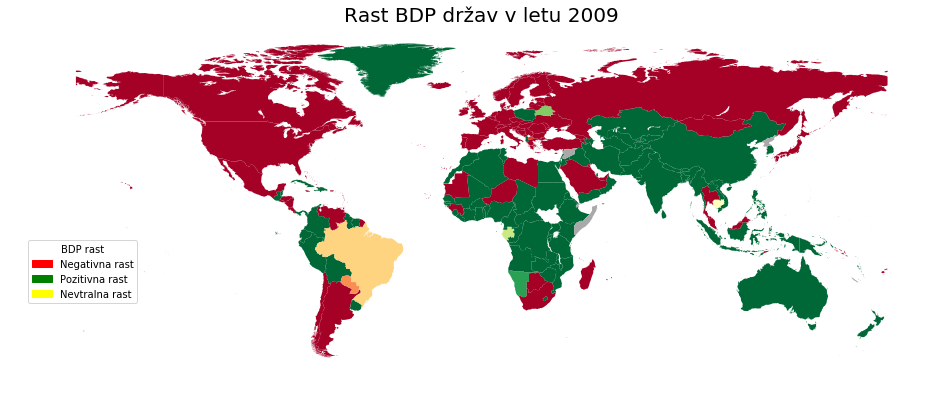

In [5]:
fig = plt.figure()
ax = merged.dropna().plot(column=year, cmap=cmap, figsize=figsize, scheme='fisher_jenks', k=colors, legend=True)

merged[merged.isna().any(axis=1)].plot(ax=ax, facecolor='#A9A9A9')

ax.set_axis_off()
ax.set_title(title, fontdict={'fontsize': 20})

red_patch = mpatches.Patch(color='red', label='Negativna rast')
green_patch = mpatches.Patch(color='green', label='Pozitivna rast')
yellow_patch = mpatches.Patch(color='yellow', label='Nevtralna rast')
ax.legend(handles=[red_patch, green_patch, yellow_patch])
ax.get_legend().set_bbox_to_anchor((.12, .4))
ax.get_legend().set_title('BDP rast')